In [3]:
# setup
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from sklearn import datasets
from sklearn.datasets.base import Bunch
from IPython.display import Image
%matplotlib inline

# Enkleste Klassifisering i manns minne

Her skal jeg prøve å lage det enkleste som over hodet mulig for å klassifisere 2 datasett med litt overlapp.

## Grunnlaget

Når vi kaster kron og mynt vet vi at sannsynligheten for å få krone er 50%. Men dersom vi kaster krona noen få ganger er vi ikke nødt til å ende opp med 50% krone vi får trolig noe som bommer litt.

Klasifiseringen jeg ønsker å gjøre kommer også til å være basert på litt for få datapunkter til å kunne si helt perfekt hva sannsynligheten for de forskjellige klassene er. Men, for å gjøre det lettere for oss selv, så lager jeg en normalfordeling (sannsynligheten) av en verdi for to klasser $c = \{a, b\}$ som den ideelle sannheten som jeg senere skal generere datasettene fra.

#### Mattenotater
* Gjennomsnitt: $\mu$
* Standardavvik: $\sigma$
* Normalfordeling: $\mathcal{N}(\mu,\,\sigma^2)$

In [13]:
a_mean = 10
a_std = 2.5
a_norm = norm(loc=a_mean, scale=a_std)

b_mean = 17
b_std = 3
b_norm = norm(loc = b_mean, scale = b_std)

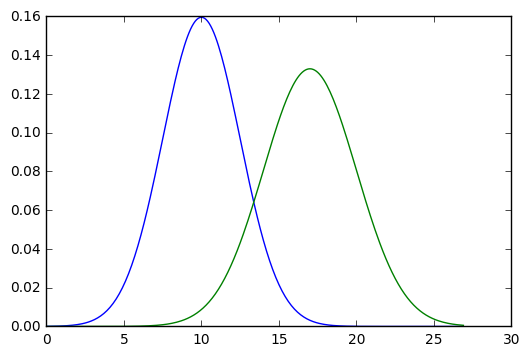

In [14]:
# plot
x = np.arange(0, 27, .1)
plt.plot(x, a_norm.pdf(x), color='b')
plt.plot(x, b_norm.pdf(x), color='g')
plt.show()

Jeg har ikke gitt normalfordelingene $a$ og $b$ noen mening. Men for å forstå det bedre kan vi tenke på det som måling av størrelsen av adamseplet i militæropptaket. $x$-aksen er størrelsen i milimeter $y$-aksen er frekvens-ish. Klassen $a$ er jenter og blå, klassen $b$ er gutter og grønn.

## Problemet


In [15]:
# calculate overlap percentage
overlap = lambda x: np.minimum(a_norm.pdf(x),b_norm.pdf(x));
prob_sum = scipy.integrate.quad(overlap, -np.inf, np.inf)[0] / 2 # MAGIC NUMBER 2, quad(pdf) == 1. 2 pdfs

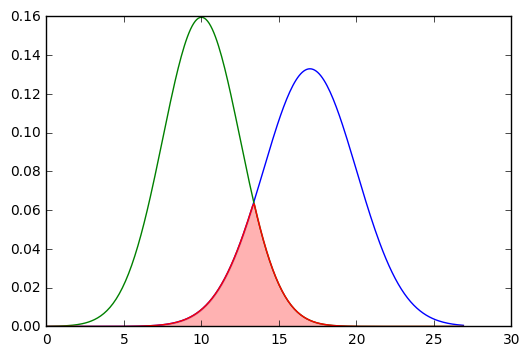

In [16]:
# plot problem area
x = np.arange(0, 27, .1)
plt.plot(x, b_norm.pdf(x), x, a_norm.pdf(x))
plt.plot(x, overlap(x))
plt.fill_between(x, overlap(x), color='r', alpha=0.3)
plt.show()

#### mattenotater
* overlapp funksjonen: $l(x) = min(K_1(x),K_2(x))$
* arealet under $ = \int l(x) dx$
* fordi $\int {K_i(x)}dx = 1$ deler vi arealet på 2 for å finne prosenten

Ved perfekt klassifisering skal det være omtrent {{ "%.2f" % prob_sum }}% feil, fordi det er umulig å klassifisere verdier i det røde området til korrekt verdi.

## Random data
Generer randomisert data, $1000$ tilsammen.

In [17]:
n = 1000
a_data = a_norm.rvs(size=n/2)
b_data = b_norm.rvs(size=n/2)

In [18]:
# create a dataset

data = np.concatenate((a_data, b_data), axis=0)
target = np.concatenate(([1 for _ in range(a_data.size)], [2 for _ in range(b_data.size)]))
dataset = Bunch(data=data, target=target)


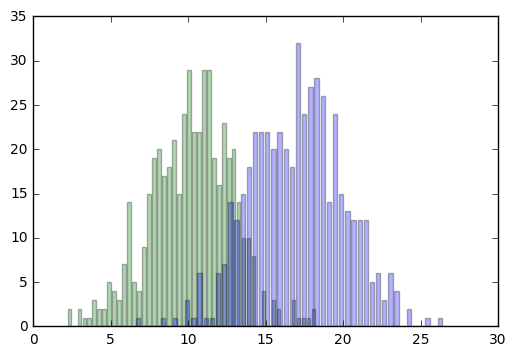

In [19]:
# plot
def histogram_values(values, color):
    hist, bins = np.histogram(values, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width, color=color, alpha=0.3)

histogram_values(a_data, 'g');  
histogram_values(b_data, 'b');
plt.show()

# $k$-nearest neighbor algorithm ($k$NN)

In [20]:
# image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png')

$k$NN er en av de eldste og enkleste algoritmene for å klassifisere ukjent data. Den tar inn et ukjennt eksempel (grønn) og finner de $k=3$ nærmeste naboene. Så samler den inn stemmer fra naboene, og gir den merkelappen "rød".

## Distanse

Diff mellom to punkter: $ d(x, y) = |x-y|$

#### Mattenotater:
* ofte brukes euclids distanse $d(\vec{x}, \vec{y}) = \sqrt{\sum_i{(x_i - y_i)^2}}$

In [21]:
euclid = lambda x,y: np.linalg.norm(x-y)
euclid(1, 2)

1.0

## Klassifiseringsregel (majority vote)



In [46]:
def majority_vote_classify(distance_function, dataset, x, k=3):
    distances = np.vectorize(distance_function)(dataset.data, x)
    idx = np.argpartition(distances, k)
    #print "values", dataset.data[idx[:k]]
    print "targets", dataset.target[idx[:k]]
    closest_classes = dataset.target[idx[:k]]
    cl = np.bincount(closest_classes).argmax()
    return cl

print majority_vote_classify(euclid, dataset, 10, k=5)
print majority_vote_classify(euclid, dataset, 12.55, k=5)
print majority_vote_classify(euclid, dataset, 20, k=5)

targets [1 1 1 1 1]
1
targets [1 1 2 1 2]
1
targets [2 2 2 2 2]
2


Ok, det var latterlig enkelt. Ai må være vanskeligere enn dette...